In [1]:
#imports

import pathlib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import numpy as np

P:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Loading the data and separating it into train and test sets

In [2]:
#load data and separate datasets
working_dir = pathlib.Path().absolute()
df = pd.read_excel ( str(working_dir) + r'\perfdata.xlsx')

df= df.drop(['Test No', 'Configuration no', 'Ramp up time'], axis=1)

X= df.iloc[:, 0:74]
y= df['Average error rate']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size = 0.8, random_state=42)



Exploring the dataset

In [3]:
print(len(df.columns.values))
df.columns.values

75


array(['db_replicas_1', 'db_replicas_2', 'db_mem_req_0.1',
       'db_mem__req_0.2', 'db_mem_limit_1', 'db_mem_limit_2',
       'db_cpu_request_0.05', 'db_cpu_request_0.1', 'db_cpu_limit_0.1',
       'db_cpu_limit_1', 'registry_replicas_1', 'registry_replicas_2',
       'registry_mem_request_0.25g', 'registry_mem_request_0.5g',
       'registry_mem_limi_0.25gi', 'registry_mem_limi_0.5gi',
       'registry_cpu_request_0.01', 'registry_cpu_request_0.02',
       'registry_cpu_limit_0.15', 'registry_cpu_limit_1',
       'persistence_replicas_1', 'persistence_replicas_2',
       'persistence_mem_request_0.5', 'persistence_mem_request_0.6',
       'persistence_mem_limit_0.5', 'persistence_mem_limit_1',
       'persistence_cpu_request_0.5', 'persistence_cpu_request_0.6',
       'persistence_cpu_limit_0.6', 'persistence_cpu_limit_1',
       'auth_replicas_1', 'auth_replicas_2', 'auth_mem_request_0.5',
       'auth_mem_request_1', 'auth_mem_limit_1', 'auth_mem_limit_2',
       'auth_cpu_request

## Training the first two (vanilla) models 

### Model 1: [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

### Model 2: [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [4]:
#model 1 - Decision Tree Regressor

model1_dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=10, max_features='auto')
model1_dtr.fit(X_train, y_train)

#model 2 - RandomForestRegressor

model2_rfr = RandomForestRegressor(criterion='friedman_mse', max_depth=None, max_features='auto', n_estimators = 100, n_jobs=-1)
model2_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='friedman_mse',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Returning, evaluating and plotting results from the first two models

In [5]:
#scores

model1_dtr_score_train = model1_dtr.score(X_train, y_train)
model1_dtr_score_test = model1_dtr.score(X_test, y_test)
dtr_y_pred = model1_dtr.predict(X_test)

model2_rfr_score_train = model2_rfr.score(X_train, y_train)
model2_rfr_score_test = model2_rfr.score(X_test, y_test)
rfr_y_pred = model2_rfr.predict(X_test)

In [6]:
#text output function

def text_out (model_train_score, model_test_score, y_test_values, model_y_pred):
    text_out = {
        "train score": round(model_train_score, 2),
        "test score": round(model_test_score, 2),
        "R-squared": round(r2_score(y_test_values, model_y_pred), 3),
        "MAE": round(mean_absolute_error(y_test_values, model_y_pred), 3),
        "MSE": round(mean_squared_error(y_test_values, model_y_pred),3 )
    }
    return print(text_out)

In [7]:
#results
text_out(model1_dtr_score_train, model1_dtr_score_test, y_test, dtr_y_pred)
text_out(model2_rfr_score_train,model2_rfr_score_test, y_test, rfr_y_pred)

{'train score': 1.0, 'test score': 0.59, 'R-squared': 0.585, 'MAE': 8.459, 'MSE': 147.99}
{'train score': 0.96, 'test score': 0.66, 'R-squared': 0.657, 'MAE': 9.161, 'MSE': 122.483}


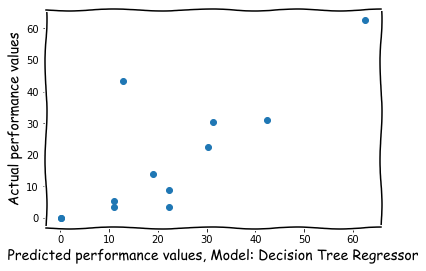

In [8]:
#Plots

plt.xkcd()

plt.scatter(dtr_y_pred, y_test)
plt.xlabel('Predicted performance values, Model: Decision Tree Regressor')
plt.ylabel('Actual performance values')
plt.show()

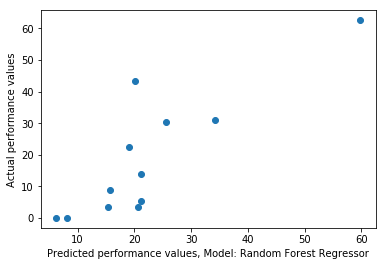

In [9]:
plt.scatter(rfr_y_pred, y_test)
plt.xlabel('Predicted performance values, Model: Random Forest Regressor')
plt.ylabel('Actual performance values')
plt.show()

### A few function defintions

In [10]:
def param_tuningDTR(X, y):
    # returns the best params
    crit = []
    spli = []
    dep = []
    r2scr = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    dept_df = pd.DataFrame()
    dept_df['y'] = y_test

    criterion = ['mse', 'friedman_mse', 'mae']
    for cr in criterion:
        split = ['random', 'best']
        for sp in split:
            depth = [2, 4, 6, 8, 10]
            for m in depth:
                mlregr = DecisionTreeRegressor(criterion=cr, splitter=sp, max_depth=m, max_features='auto')
                mlregr.fit(X_train, y_train)

                y_predicted = mlregr.predict(X_test)
                crit.append(cr)
                spli.append(sp)
                dep.append(m)
                r2_score_x = r2_score(y_test, y_predicted)
                r2scr.append(r2_score_x)
                dept_df["depth(" + str(m) + ")"] = y_predicted.tolist()

    history = pd.DataFrame(list(zip(crit, spli, dep, r2scr)),
                           columns=['criterion', 'splitter', 'max_depth', 'r2_score'])
    best_params = history.iloc[history['r2_score'].idxmax()]

    return best_params, dept_df, depth

def param_tuningRFR(X, y):
    # returns the best params
    crit = []
    n_estimate = []
    dep = []
    r2scr = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    dept_df = pd.DataFrame()
    dept_df['y'] = y_test

    estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for n_est in estimators:
        criterion = ['mse', 'friedman_mse', 'mae']
        for cr in criterion:
            depth = [2, 4, 6, 8, 10]
            for m in depth:
                mlregr = RandomForestRegressor(n_estimators = n_est, criterion=cr, max_depth=m, max_features='auto')
                mlregr.fit(X_train, y_train)

                y_predicted = mlregr.predict(X_test)
                crit.append(cr)
                n_estimate.append(n_est)
                dep.append(m)
                r2_score_x = r2_score(y_test, y_predicted)
                r2scr.append(r2_score_x)
                dept_df["depth(" + str(m) + ")"] = y_predicted.tolist()

    history = pd.DataFrame(list(zip(n_estimate, crit, dep, r2scr)),
                           columns=['n_estimators', 'criterion', 'max_depth', 'r2_score'])
    best_params = history.iloc[history['r2_score'].idxmax()]

    return best_params, dept_df, depth

## Creating and testing model 3: DTR with optimised hyperparameters

In [11]:
#optimised DTR model hyperparamters (addresses overfitting)
best_params, dept_df,depth = param_tuningDTR(X, y)
model3_dtr_optm= DecisionTreeRegressor(criterion=str(best_params[0]), splitter=best_params[1], max_depth=int(best_params[2]),max_features='auto')

model3_dtr_optm.fit(X_train, y_train)
model3_dtr_optm_score_train=model3_dtr_optm.score(X_train,y_train)
model3_dtr_optm_score_test = model3_dtr_optm.score(X_test, y_test)
y_pred_model3_dtr_optm = model3_dtr_optm.predict(X_test)

text_out(model3_dtr_optm_score_train, model3_dtr_optm_score_test, y_test, y_pred_model3_dtr_optm)

{'train score': 0.96, 'test score': 0.67, 'R-squared': 0.674, 'MAE': 8.728, 'MSE': 116.191}


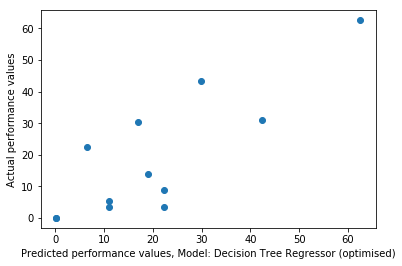

In [12]:

plt.scatter(y_pred_model3_dtr_optm, y_test)
plt.xlabel('Predicted performance values, Model: Decision Tree Regressor (optimised)')
plt.ylabel('Actual performance values')
plt.show()

## Creating and testing model 4: RFR with optimised hyperparameters

In [13]:
#optimised RFR model hyperparamters
best_params, dept_df,depth = param_tuningRFR(X, y)
model4_rfr_optm= RandomForestRegressor(n_estimators = (best_params[0]), criterion=str(best_params[1]), max_depth=int(best_params[2]),max_features='auto')

model4_rfr_optm.fit(X_train, y_train)
model4_rfr_optm_score_train=model4_rfr_optm.score(X_train,y_train)
model4_rfr_optm_score_test = model4_rfr_optm.score(X_test, y_test)
y_pred_model4_rfr_optm = model4_rfr_optm.predict(X_test)

text_out(model4_rfr_optm_score_train, model4_rfr_optm_score_test, y_test, y_pred_model4_rfr_optm)

{'train score': 0.92, 'test score': 0.53, 'R-squared': 0.526, 'MAE': 11.557, 'MSE': 169.094}


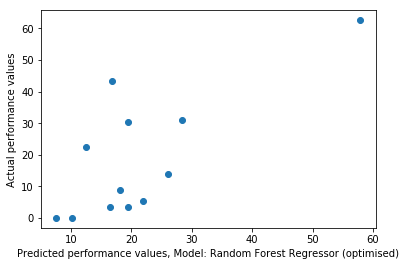

In [14]:
plt.scatter(y_pred_model4_rfr_optm, y_test)
plt.xlabel('Predicted performance values, Model: Random Forest Regressor (optimised)')
plt.ylabel('Actual performance values')
plt.show()